In [31]:
import numpy as np #importar libreria matematica
import plotly.express as px #herramienta de plot
import plotly.graph_objects as go

# Taller Dinámica

## Calculando al coyote
>Una pena que las leyes de la física no acompañen al coyote pero lo vamos a ayudar.
>Considere que se modela el sistema de la piedra que cae de la siguiente manera (2D):
>Un cuerpo cuadrado de b=3[m] de masa m=2000[kg] que pivota sobre la esquina (punto O). Suponga que la piedra rueda sin deslizar y que hay una fricción en la rueda con µ=0.3 .
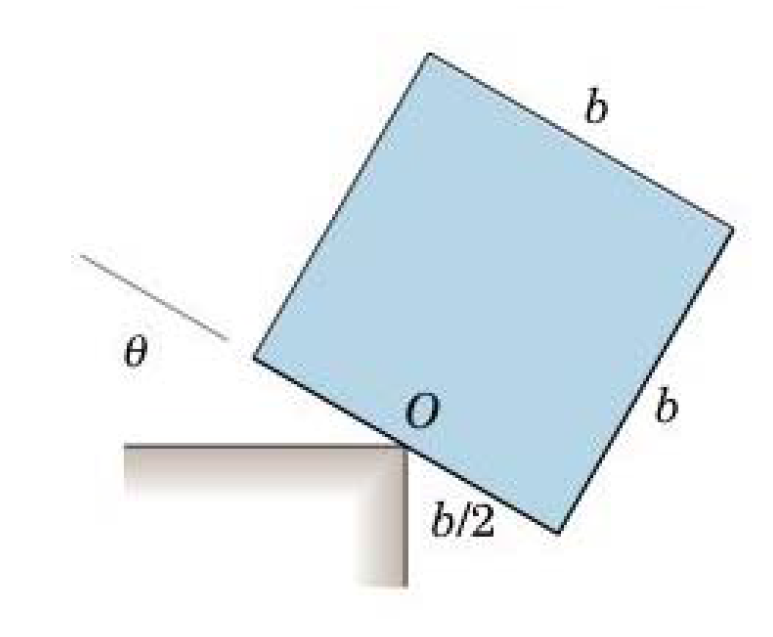

## Calcule:

>- El ángulo al cual el cuerpo pierde contacto con la esquina (punto O) y empieza a caer 
>- Para esto, va a necesitar realizar un gráfico de la variación de la normal con respecto al ángulo de giro*
>- Y ya que estamos también realice un gráfico de la variación de la velocidad angular hasta el mismo ángulo del literal anterior
>- ¿Podría pasar lo que pasó en el vídeo?

>- Primero se va a realizar un DCL del fenómeno para poder analizar lo que está ocurriendo en el evento que el coyote desea dejar caer la roca sobre el correcaminos. 
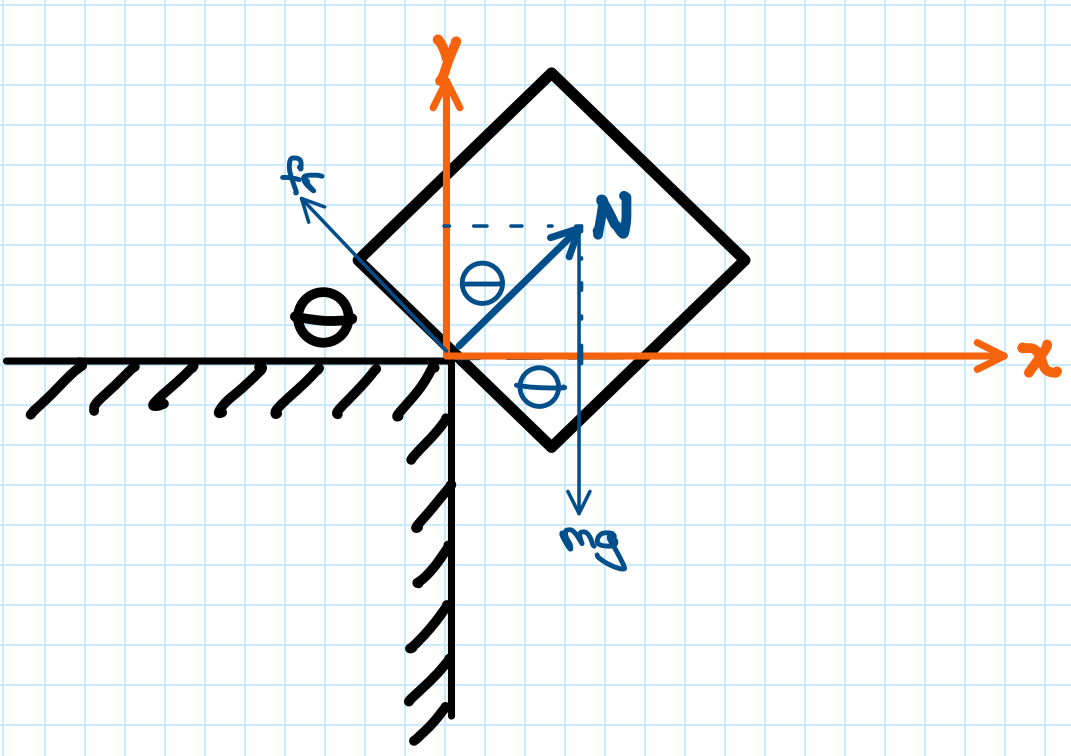
>- Una vez que se han representado gráficamente todas las fuerzas que están interviniendo en el fenómenos (tomando como punto de referencia del sistema de coordenadas al punto de contacto entre el bloque y el filo del acantilado, se procede a realizar una sumatoria de fuerzas en los dos ejes, $x$ y $y$. 

$$\sum F_x=0$$<br>
$$-fr\cdot cos(\theta) + N\cdot sen(\theta)=0$$
$$-\mu \cdot N\cdot cos(\theta) + N\cdot sen(\theta)=0$$
$$N(sen(\theta)-\mu \cdot cos(\theta))=0$$
Por lo tanto se tiene que: $N=0$ v $sen(\theta)-\mu \cdot cos(\theta)=0$. Como en este punto el interés es hallar el ángulo, se trabajará con la segunda expresión.<br>
$$sen(\theta)-\mu \cdot cos(\theta)=0$$
$$tan(\theta)-\mu =0$$
$$\mu=tan(\theta)$$
$$\theta=arctan(\mu)$$
Y como se conoce que el $ \mu_{estatico}$ es igual a $0.3$, entonces se tiene que el ángulo $\theta$ es: 
$$\theta=16.6992°$$
Debe entenderse que este ángulo ha sido hallado utilizando las ecuaciones de equilibrio, lo que significa que el cuerpo está en equilibrio eminente a este ángulo de inclinación, lo que significa que con la más mínima perturbación el cuerpo perderá su estado de equilibrio. Por lo tanto, el ángulo al cual el cuerpo pierde contacto y empieza a caer será apenas el ángulo sea mayor al indicado de $16.6992°$. 
Ahora, se desea hallar una función para la normal, para lo cual ahora se procederá a realizar la sumatoria de fuerzas en el eje de las $y$ así: 

$$\sum F_x=0$$
$$fr\cdot sen(\theta) + N\cdot cos(\theta)-mg=0$$
$$\mu \cdot N \cdot sen(\theta) + N\cdot cos(\theta)-mg=0$$
$$N(\mu sen(\theta + cos(\theta))=mg$$
$$N=\frac{mg}{\mu sen(\theta + cos(\theta)}$$

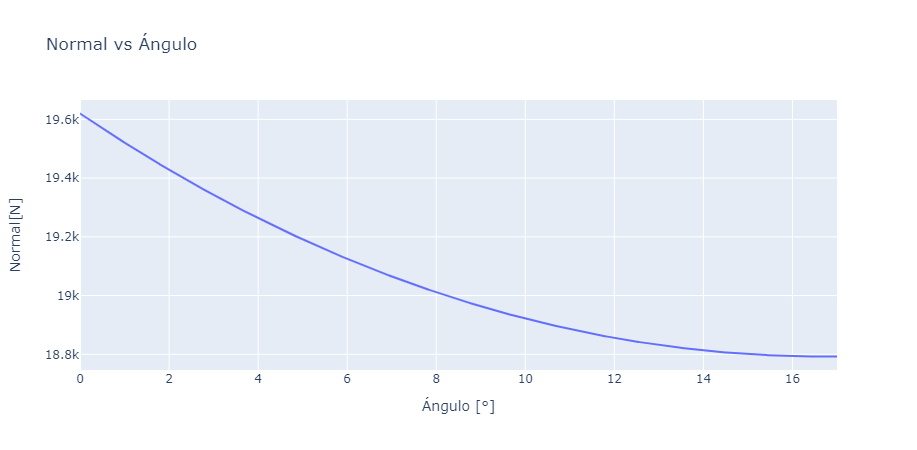

In [34]:
import numpy as np #importar libreria matematica
import plotly.express as px #herramienta de plot
import plotly.graph_objects as go

m=2000
g=9.81
u=0.3

#Análisis
th=np.linspace(0,17,699) #creando lista numérica
N=(m*g)/((u*np.sin(np.radians(th)))+(np.cos(np.radians(th))))
#Plot
fig=px.line(x=th,y=N,labels={'x':'Ángulo [°]','y':'Normal[N]'},title="Normal vs Ángulo")
fig.show()

>- Ahora, se pide hallar un gráfico de la variación de la velocidad angular hasta el mismo ángulo del literal anterior. Para esto, se realizará una sumatoria de Torques netos alrededor de O, es decir el origen del sistema de coordenadas elegido. <br>
Se plantea la ecuación y se tiene lo siguiente: 

$$\sum \tau = I\cdot \alpha \label{1} \tag{1}$$

>- Como se observa, es necesario encontrar primero la inercia del bloque. Y puesto que no gira respecto a su centro de masa es necesario calcularla. Para lo cual se hallará de la siguiente forma: 

$$I=I_{CM}+m\cdot d^2 $$
Donde $d$ como se puede observa en el gráfico es $\frac{b}{2}$. Reemplazando se tiene lo siguiente: 
$$I=I_{CM}+m\cdot \frac{b^2}{4}$$

>- Revisando en tablas se tiene que el $I_{CM}$ para un cuadrado se obtiene así:
$$I_{CM}=\frac{1}{12}\cdot m\cdot (b^2+b^2)$$
Por lo tanto se tiene que la $I_{CM}=\frac{1}{6}mb^2$
De esta forma se tiene que 
$$I=\frac{1}{6}\cdot 2000\cdot3^2+2000\cdot \frac{9}{4}$$
$$I=7500$$

>- Si reemplazamos $I$ en la ec.\ref{1} y haciendo la sumatoria de torques externos, entonces se tiene lo siguiente:

$$-m\cdot g\cdot \frac{b}{2}\cdot sen(\theta)\vec{k}=I\cdot \dot w$$
Nótese que $\dot w$ es una derivada implícita, por lo cual se la representará usando esta notación:
$$\dot w=\frac{dw}{dt}\cdot \frac{d\theta}{d\theta}$$
Por lo tanto se tiene lo siguiente: 
$$-m\cdot g\cdot \frac{b}{2}\cdot sen(\theta)\vec{k}=I\cdot w\cdot \frac{dw}{d\theta}$$
Donde al despejar $w\cdot dw$ se tiene lo siguiente:
$$w\cdot dw=\frac{-m\cdot g\cdot \frac{b}{2}\cdot sen(\theta)}{I}d\theta$$
Como se debe hallar una función para $w$, se integra a ambos lados
$$\int_{0}^{w} \! w \,dw = \int_{180}^{180-\theta} \! \frac{-m\cdot g\cdot \frac{b}{2}\cdot sen(\theta)}{I}  \,d\theta$$
$$\frac{w^2}{2}=-\frac{m\cdot g\cdot b}{2I}\cdot (1-cos\theta)$$
$$w=(\frac{m\cdot g\cdot b\cdot (1-cos\theta)}{I})^{1/2}$$

Finalmente, se realiza la gráfica para la velocidad angular $w$ en función de $\theta$

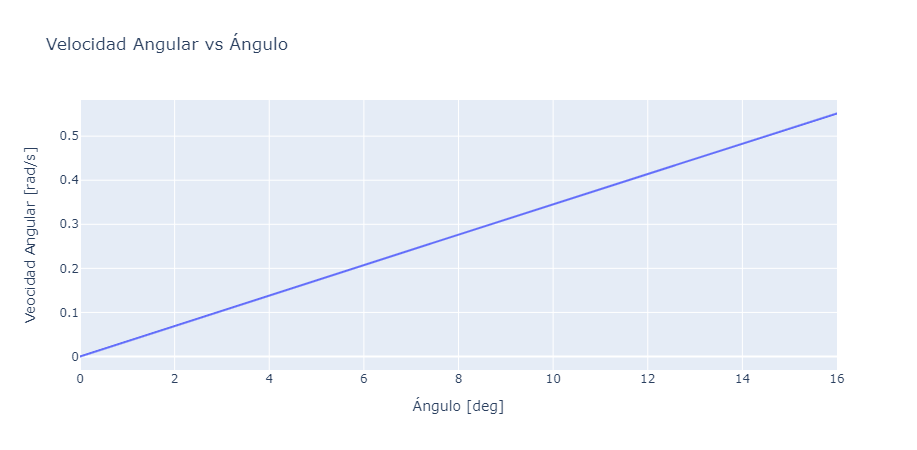

In [49]:
import numpy as np #importar libreria matematica
import plotly.express as px #herramienta de plot
import plotly.graph_objects as go

m=2000
g=9.81
b=3
I=3013.5

#Análisis
t=np.linspace(0,16,699) #creando lista numérica
w=np.sqrt(7.848*(1-np.cos(np.radians(t))))
#Plot
fig=px.line(x=t,y=w,labels={'x':'Ángulo [deg]','y':'Veocidad Angular [rad/s]'},title="Velocidad Angular vs Ángulo")
fig.show()

>- No podría pasar lo observado en el vídeo porque para que eso pasara (que le cae la roca al coyote), entonces debería haber otra fuerza que genere un torque en sentido antihorario, y en este caso la única fuerza que genera un torque es el propio peso de la roca. 